In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
data=pd.read_csv("/content/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 5)

Checking Null Values

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
LE= LabelEncoder()

In [11]:
for i in  data.columns:
  if is_numeric_dtype(data[i]):
    continue

  else:
    data[i]=LE.fit_transform(data[i])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Visualization

In [ ]:
sns.countplot(x="species",data=data,palette="Set2")
plt.show()

In [ ]:
sns.histplot(data=data,x=data.sepal_length,color="yellow")

In [ ]:
sns.histplot(data=data,x=data.sepal_width,color="green")

In [ ]:
sns.histplot(data=data,x=data.petal_length,color="red")

<Axes: xlabel='petal_width', ylabel='Count'>

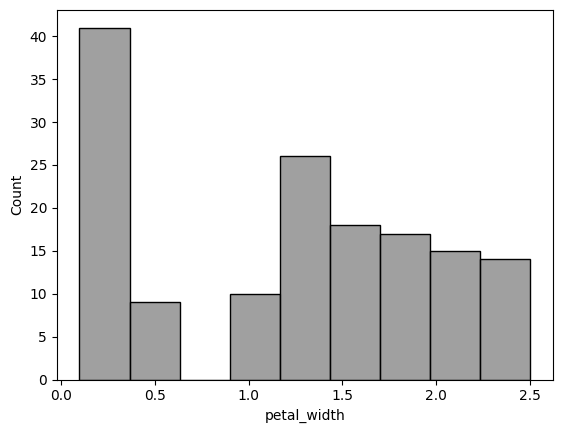

In [16]:
sns.histplot(data=data,x=data.petal_width,color="grey")

Heatmap

<Axes: >

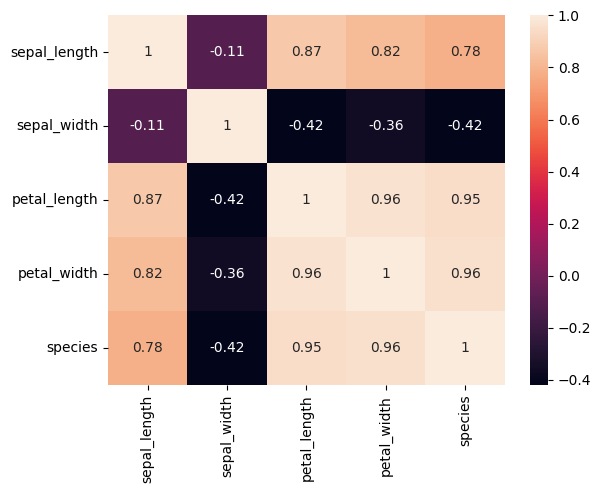

In [21]:
#Correlation
crl=data.corr()
sns.heatmap(crl,annot=True)

Data Preparation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Predictor & target variable

In [23]:
a=data.drop(["species"],axis=1)
b=data.species


In [24]:
a_train,a_test,b_test,b_train=train_test_split(a,b,test_size=0.5)

In [25]:
model_1=LogisticRegression()
model_1.fit(a_train,b_train)

LogisticRegression()

Verifying the Accuracy

In [26]:
print("Trained Data Score",model_1.score(a_train,b_train))
print("Trained Data Score",model_1.score(a_test,b_test))

Trained Data Score 0.48
Trained Data Score 0.29333333333333333


In [27]:
model_2=RandomForestClassifier(n_estimators=300,random_state=100)
model_2.fit(a_train,b_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [28]:
model_3=KNeighborsClassifier()
model_3.fit(a_train,b_train)

KNeighborsClassifier()

Verifying the accuracy of the model

In [132]:
print("score for the trained data",model_3.score(a_train,b_train))
print("score for the test data",model_3.score(a_test,b_test))

score for the trained data 0.6133333333333333
score for the test data 0.38666666666666666


Model Testing

In [29]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


creating new dataframe

In [30]:
data_2={"sepal_length":[5.2],"sepal_width":[3.6],"petal_length":[1.4],"petal_width":[0.2]}
trail=pd.DataFrame(data_2)

Predict & Display the result

In [34]:
final_result=model_3.predict(trail) # predict

print("Final Result of Species: ",final_result[0])# display the result


Final Result of Species:  0
